In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../Resources/whatoplay_data.csv")
data = pd.read_csv("../Resources/MLdata.csv")
data2 = pd.read_csv("../Resources/grouped_years_platforms_names.csv")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195 entries, 0 to 1194
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             1195 non-null   object 
 1   Platform         1195 non-null   object 
 2   Year_of_Release  1195 non-null   int64  
 3   Genre            1195 non-null   object 
 4   Publisher        1195 non-null   object 
 5   NA_Sales         1195 non-null   float64
 6   EU_Sales         1195 non-null   float64
 7   JP_Sales         1195 non-null   float64
 8   Other_Sales      1195 non-null   float64
 9   Global_Sales     1195 non-null   float64
 10  Critic_Score     1195 non-null   int64  
 11  Critic_Count     1195 non-null   int64  
 12  User_Score       1195 non-null   float64
 13  User_Count       1195 non-null   int64  
 14  Developer        1195 non-null   object 
 15  Rating           1195 non-null   object 
 16  PlayScore        1195 non-null   float64
 17  GameScore     

In [4]:
data['Platform'].unique()

array([2, 0, 3, 1], dtype=int64)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

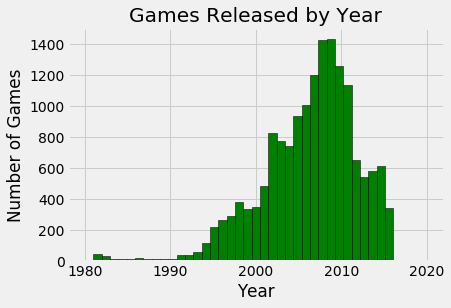

In [6]:
years = data2["Year"].max() - data2["Year"].min() + 1
plt.hist(data2["Year"], bins=years, color="green", edgecolor="black")
plt.title("Games Released by Year")
plt.xlabel("Year")
plt.ylabel("Number of Games");
plt.savefig("../templates/images/GamesReleasedByYear.png", bbox_inches='tight')

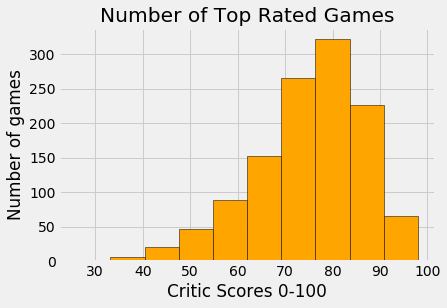

In [7]:
plt.hist(df["Critic_Score"], bins=10, color="orange", edgecolor="black")
plt.title("Number of Top Rated Games")
plt.xlabel("Critic Scores 0-100")
plt.ylabel("Number of games");
plt.savefig('../templates/images/TopRated.png', bbox_inches='tight')

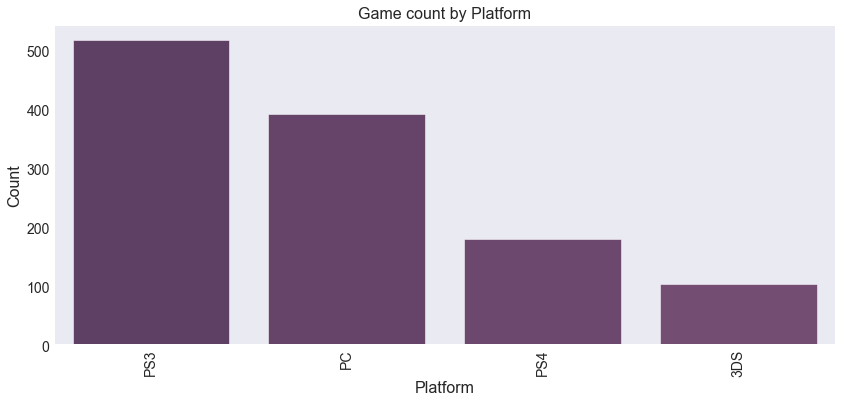

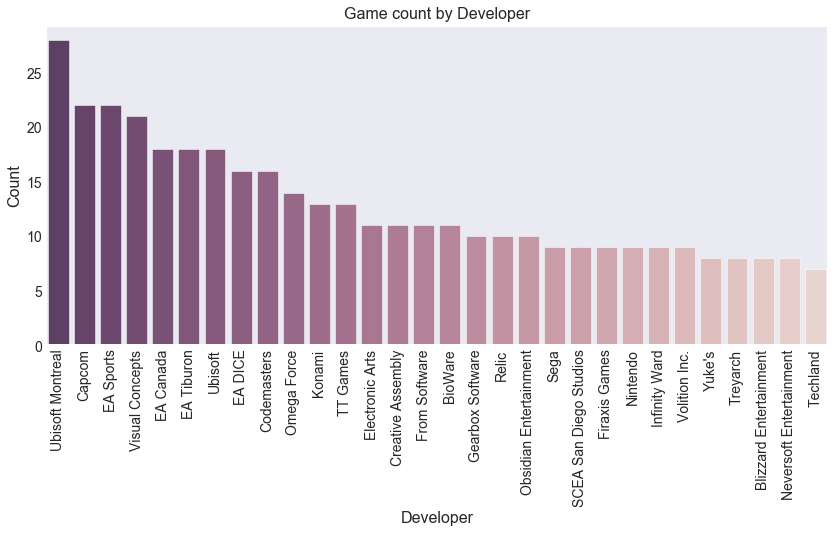

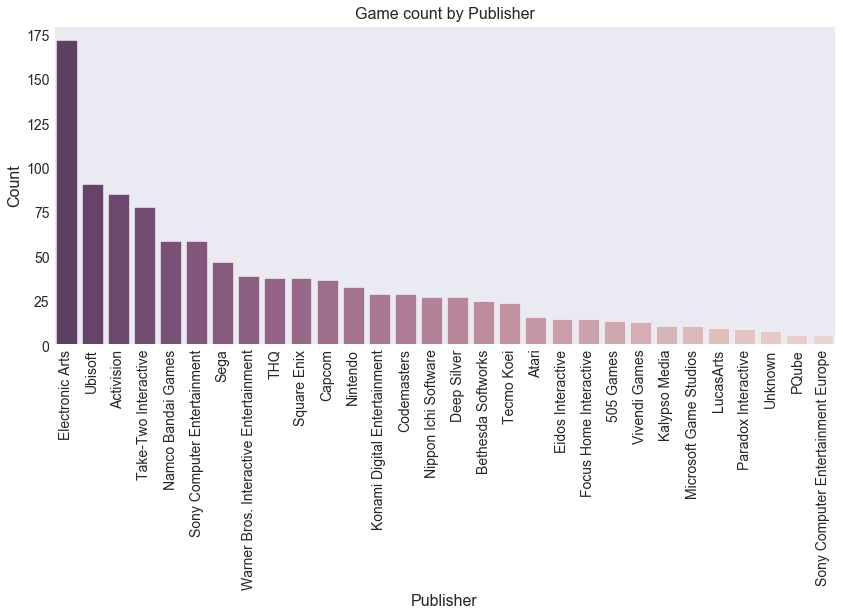

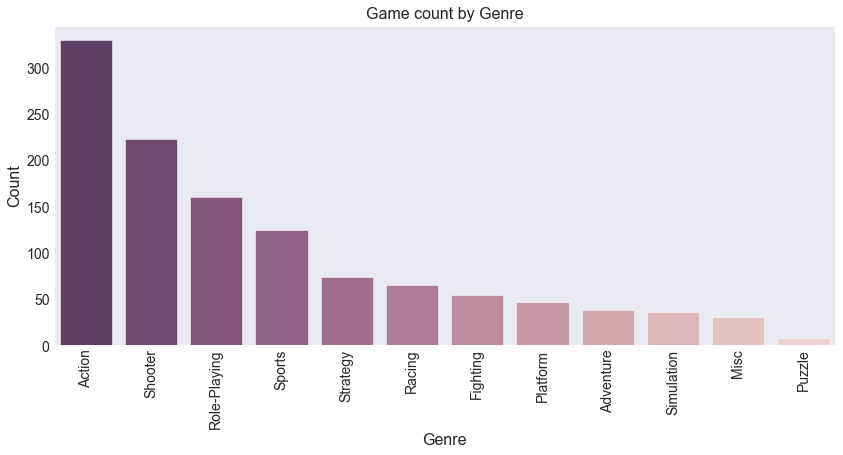

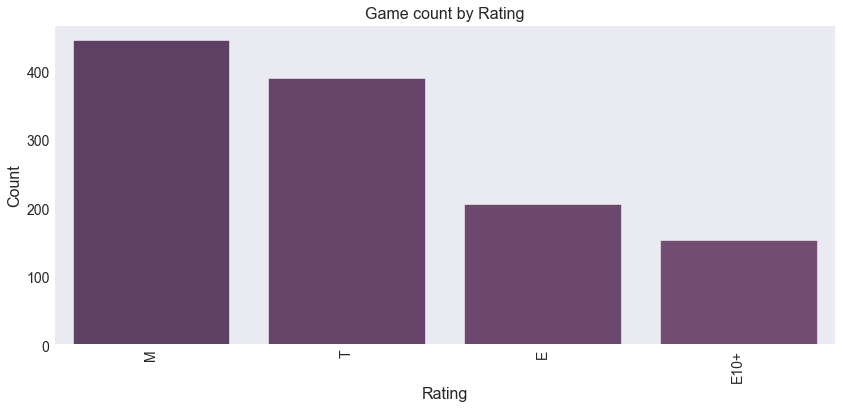

In [8]:
cols = ['Platform', 'Developer', 'Publisher', 'Genre', 'Rating']

for col in cols:
    chart = df[['Name', col]].groupby([col]).count().sort_values('Name', ascending=False).reset_index()
    sns.set_style("dark")
    plt.figure(figsize=(12.5, 5.5))
    plt.xticks(rotation=90)
    sns.barplot(x=col, y='Name', data=chart[:30], palette=sns.cubehelix_palette((12 if col == 'Genre' else 30), dark=0.3, light=.85, reverse=True)).set_title(('Game count by '+col), fontsize=16)
    plt.ylabel('Count', fontsize=16)
    plt.xlabel(col, fontsize=16)

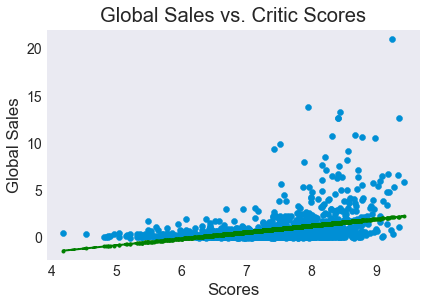

In [9]:
from scipy import stats


X = df['CriticScore']                                               
y = df['Global_Sales']
                                                            
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(X, y)  
vc_fit = vc_slope * X + vc_int

plt.scatter(X, y)
plt.plot(X, vc_fit, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=3)
plt.xlabel('Scores')
plt.ylabel('Global Sales')
plt.title("Global Sales vs. Critic Scores")
plt.savefig("../templates/images/linear.png", bbox_inches='tight')
plt.show()


In [10]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [11]:
def mae(real, prediction):
    return np.average(abs(real - prediction))

In [12]:
def error(model):
    model.fit(X_train, y_train)
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)

    # Return the performance metric
    return model_mae

In [13]:
def prediction(model):
    model.fit(X_train, y_train)
    model_pred = model.predict(X_test)

    # Return the performance metric
    return model_pred

In [14]:
from sklearn.metrics import accuracy_score

def accuracy(model):
    model.fit(X_train, y_train)
    model_pred = model.predict(X_test)
    model_accuracy = model.score(X_test, y_test)

    # Return the performance metric
    return model_accuracy

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
def r2(model):
    model.fit(X_train, y_train)
    model_pred = model.predict(X)
    model_r2 = r2_score(y_test, model_pred)

    # Return the performance metric
    return model_score

In [19]:
#  weighted_features will not work unless first running the Weighted_Scores column being added in later in the notebook. Note to self: Fix that in the encoding notebook

weighted_features = data[["Critic_Score", "User_Score", "PlayScore", "GameScore", "CriticScore", "User_Count", "Critic_Count", "TopSellers", "Weighted_Score"]]
features = data[["Critic_Score", "User_Score", "PlayScore", "GameScore", "CriticScore", "User_Count", "Critic_Count", "TopSellers"]]
full_features = data[["Critic_Score", "User_Score", "PlayScore", "GameScore", "CriticScore", "User_Count", "Critic_Count", 
                      "Name", "Platform","Year_of_Release", "Genre", "Publisher", "Developer", "Rating", "TopRated", "Weighted_Score"]]

X = full_features
#X = features.drop(["TopSellers"], axis=1)
y = features['TopSellers'].values.reshape(-1, 1)

print(X.shape)
print(y.shape)

(1195, 16)
(1195, 1)


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [36]:
print("Linear Regression Performance: Prediction Accuracy = {:.04f}".format(LRaccuracy))
print("Logistic Regression Performance: Prediction Accuracy = {:.04f}".format(LogRaccuracy))
print("Support Vector Machine Performance: Prediction Accuracy = {:.04f}".format(SVMaccuracy))
print("Random Forest Regression Performance: Prediction Accuracy = {:.04f}".format(RFaccuracy))
print("Gradient Boosting Performance: Prediction Accuracy = {:.04f}".format(GBaccuracy))
print("K-Nearest Neighbors Performance: Prediction Accuracy = {:.04f}".format(KNNaccuracy))
print("Ridge Performance: Prediction Accuracy = {:.04f}".format(ridge_accuracy))
print("Deep Learning Performance: Prediction Accuracy = {:.04f}".format(model_accuracy))


Linear Regression Performance: Prediction Accuracy = 0.2308
Logistic Regression Performance: Prediction Accuracy = 0.7793
Support Vector Machine Performance: Prediction Accuracy = 0.7492
Random Forest Regression Performance: Prediction Accuracy = 0.4334
Gradient Boosting Performance: Prediction Accuracy = 0.4328
K-Nearest Neighbors Performance: Prediction Accuracy = 0.0888
Ridge Performance: Prediction Accuracy = 0.2279
Deep Learning Performance: Prediction Accuracy = 0.8161


In [22]:
LR = LinearRegression()
LRmae = error(LR)
LRprediction = prediction(LR)
LRaccuracy = accuracy(LR)

print("Linear Regression Performance: Prediction Accuracy = {:.04f}".format(LRaccuracy))
print("Linear Regression Performance: MAE = {:.04f}".format(LRmae))



Linear Regression Performance: Prediction Accuracy = 0.2308
Linear Regression Performance: MAE = 0.3005


In [23]:
LogR = LogisticRegression()
LogRmae = error(LogR)
LogRprediction = prediction(LogR)
LogRaccuracy = accuracy(LogR)

print("Logistic Regression Performance: Prediction Accuracy = {:.04f}".format(LogRaccuracy))
print("Logistic Regression Performance: MAE = {:.04f}".format(LogRmae))


Logistic Regression Performance: Prediction Accuracy = 0.7793
Logistic Regression Performance: MAE = 0.3325


C:\Users\gatli\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gatli\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\gatli\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

In [24]:
from sklearn.svm import SVC 
SVM = SVC(C = 1000, gamma=0.1)
SVMmae = error(SVM)
SVMprediction = prediction(SVM)
SVMaccuracy = accuracy(SVM)

print("Support Vector Machine Performance: Prediction Accuracy = {:.04f}".format(SVMaccuracy))
print("Support Vector Machine Performance: MAE = {:.04f}".format(SVMmae))


C:\Users\gatli\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gatli\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gatli\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Support Vector Machine Performance: Prediction Accuracy = 0.7492
Support Vector Machine Performance: MAE = 0.2508


In [25]:
RandomForest = RandomForestRegressor(random_state=60)
RandomForestmae = error(RandomForest)
RFaccuracy = accuracy(RandomForest)

print("Random Forest Regression Performance: Prediction Accuracy = {:.04f}".format(RFaccuracy))
print("Random Forest Regression Performance: MAE = {:.04f}".format(RandomForestmae))

C:\Users\gatli\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\gatli\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Random Forest Regression Performance: Prediction Accuracy = 0.4334
Random Forest Regression Performance: MAE = 0.3722


In [26]:
GradientBoosting = GradientBoostingRegressor(random_state=60)
GradientBoostingmae = error(GradientBoosting)
GBaccuracy = accuracy(GradientBoosting)

print("Gradient Boosting Performance: Prediction Accuracy = {:.04f}".format(GBaccuracy))
print("Gradient Boosting Performance: MAE = {:.04f}".format(GradientBoostingmae))



C:\Users\gatli\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gatli\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Performance: Prediction Accuracy = 0.4328
Gradient Boosting Performance: MAE = 0.3816


In [27]:
KNN = KNeighborsRegressor(n_neighbors=10)
KNNmae = error(KNN)
KNNaccuracy = accuracy(KNN)

print("K-Nearest Neighbors Performance: Prediction Accuracy = {:.04f}".format(KNNaccuracy))
print("K-Nearest Neighbors Performance: MAE = {:.04f}".format(KNNmae))




K-Nearest Neighbors Performance: Prediction Accuracy = 0.0888
K-Nearest Neighbors Performance: MAE = 0.3090


In [28]:
ridge = Ridge(alpha=10)
ridge_mae = error(ridge)
ridge_accuracy = accuracy(ridge)

print("Ridge Performance: Prediction Accuracy = {:.04f}".format(ridge_accuracy))
print("Ridge Performance: MAE = {:.04f}".format(ridge_mae))


Ridge Performance: Prediction Accuracy = 0.2279
Ridge Performance: MAE = 0.3010


In [29]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [30]:
from tensorflow.keras.utils import to_categorical

y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
num_inputs = 16
model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=num_inputs))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [32]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'mse'])
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=1000,
    shuffle=True,
    verbose=2
)

Epoch 1/1000
28/28 - 0s - loss: 0.5572 - accuracy: 0.7098 - mse: 0.1891
Epoch 2/1000
28/28 - 0s - loss: 0.5113 - accuracy: 0.7556 - mse: 0.1704
Epoch 3/1000
28/28 - 0s - loss: 0.4837 - accuracy: 0.7846 - mse: 0.1600
Epoch 4/1000
28/28 - 0s - loss: 0.4638 - accuracy: 0.7969 - mse: 0.1523
Epoch 5/1000
28/28 - 0s - loss: 0.4484 - accuracy: 0.8047 - mse: 0.1462
Epoch 6/1000
28/28 - 0s - loss: 0.4359 - accuracy: 0.8158 - mse: 0.1415
Epoch 7/1000
28/28 - 0s - loss: 0.4253 - accuracy: 0.8158 - mse: 0.1373
Epoch 8/1000
28/28 - 0s - loss: 0.4150 - accuracy: 0.8248 - mse: 0.1331
Epoch 9/1000
28/28 - 0s - loss: 0.4067 - accuracy: 0.8304 - mse: 0.1299
Epoch 10/1000
28/28 - 0s - loss: 0.3981 - accuracy: 0.8337 - mse: 0.1266
Epoch 11/1000
28/28 - 0s - loss: 0.3907 - accuracy: 0.8393 - mse: 0.1237
Epoch 12/1000
28/28 - 0s - loss: 0.3832 - accuracy: 0.8404 - mse: 0.1208
Epoch 13/1000
28/28 - 0s - loss: 0.3776 - accuracy: 0.8438 - mse: 0.1186
Epoch 14/1000
28/28 - 0s - loss: 0.3703 - accuracy: 0.8482 -

Epoch 114/1000
28/28 - 0s - loss: 0.2292 - accuracy: 0.8850 - mse: 0.0724
Epoch 115/1000
28/28 - 0s - loss: 0.2290 - accuracy: 0.8873 - mse: 0.0723
Epoch 116/1000
28/28 - 0s - loss: 0.2290 - accuracy: 0.8862 - mse: 0.0723
Epoch 117/1000
28/28 - 0s - loss: 0.2291 - accuracy: 0.8873 - mse: 0.0722
Epoch 118/1000
28/28 - 0s - loss: 0.2295 - accuracy: 0.8895 - mse: 0.0725
Epoch 119/1000
28/28 - 0s - loss: 0.2291 - accuracy: 0.8895 - mse: 0.0723
Epoch 120/1000
28/28 - 0s - loss: 0.2278 - accuracy: 0.8884 - mse: 0.0719
Epoch 121/1000
28/28 - 0s - loss: 0.2283 - accuracy: 0.8884 - mse: 0.0722
Epoch 122/1000
28/28 - 0s - loss: 0.2278 - accuracy: 0.8895 - mse: 0.0719
Epoch 123/1000
28/28 - 0s - loss: 0.2273 - accuracy: 0.8917 - mse: 0.0717
Epoch 124/1000
28/28 - 0s - loss: 0.2274 - accuracy: 0.8873 - mse: 0.0718
Epoch 125/1000
28/28 - 0s - loss: 0.2272 - accuracy: 0.8884 - mse: 0.0718
Epoch 126/1000
28/28 - 0s - loss: 0.2267 - accuracy: 0.8884 - mse: 0.0715
Epoch 127/1000
28/28 - 0s - loss: 0.22

Epoch 225/1000
28/28 - 0s - loss: 0.2080 - accuracy: 0.9040 - mse: 0.0661
Epoch 226/1000
28/28 - 0s - loss: 0.2065 - accuracy: 0.9051 - mse: 0.0656
Epoch 227/1000
28/28 - 0s - loss: 0.2070 - accuracy: 0.9051 - mse: 0.0658
Epoch 228/1000
28/28 - 0s - loss: 0.2059 - accuracy: 0.9018 - mse: 0.0655
Epoch 229/1000
28/28 - 0s - loss: 0.2059 - accuracy: 0.9029 - mse: 0.0655
Epoch 230/1000
28/28 - 0s - loss: 0.2057 - accuracy: 0.9018 - mse: 0.0654
Epoch 231/1000
28/28 - 0s - loss: 0.2061 - accuracy: 0.9007 - mse: 0.0655
Epoch 232/1000
28/28 - 0s - loss: 0.2060 - accuracy: 0.9018 - mse: 0.0655
Epoch 233/1000
28/28 - 0s - loss: 0.2063 - accuracy: 0.9051 - mse: 0.0657
Epoch 234/1000
28/28 - 0s - loss: 0.2057 - accuracy: 0.9029 - mse: 0.0654
Epoch 235/1000
28/28 - 0s - loss: 0.2061 - accuracy: 0.9007 - mse: 0.0657
Epoch 236/1000
28/28 - 0s - loss: 0.2060 - accuracy: 0.9018 - mse: 0.0657
Epoch 237/1000
28/28 - 0s - loss: 0.2052 - accuracy: 0.9040 - mse: 0.0653
Epoch 238/1000
28/28 - 0s - loss: 0.20

Epoch 336/1000
28/28 - 0s - loss: 0.1951 - accuracy: 0.9074 - mse: 0.0626
Epoch 337/1000
28/28 - 0s - loss: 0.1948 - accuracy: 0.9096 - mse: 0.0625
Epoch 338/1000
28/28 - 0s - loss: 0.1952 - accuracy: 0.9085 - mse: 0.0627
Epoch 339/1000
28/28 - 0s - loss: 0.1939 - accuracy: 0.9062 - mse: 0.0621
Epoch 340/1000
28/28 - 0s - loss: 0.1948 - accuracy: 0.9062 - mse: 0.0625
Epoch 341/1000
28/28 - 0s - loss: 0.1947 - accuracy: 0.9085 - mse: 0.0625
Epoch 342/1000
28/28 - 0s - loss: 0.1940 - accuracy: 0.9074 - mse: 0.0623
Epoch 343/1000
28/28 - 0s - loss: 0.1936 - accuracy: 0.9062 - mse: 0.0621
Epoch 344/1000
28/28 - 0s - loss: 0.1936 - accuracy: 0.9051 - mse: 0.0621
Epoch 345/1000
28/28 - 0s - loss: 0.1937 - accuracy: 0.9107 - mse: 0.0621
Epoch 346/1000
28/28 - 0s - loss: 0.1943 - accuracy: 0.9074 - mse: 0.0624
Epoch 347/1000
28/28 - 0s - loss: 0.1937 - accuracy: 0.9062 - mse: 0.0622
Epoch 348/1000
28/28 - 0s - loss: 0.1928 - accuracy: 0.9085 - mse: 0.0619
Epoch 349/1000
28/28 - 0s - loss: 0.19

Epoch 447/1000
28/28 - 0s - loss: 0.1826 - accuracy: 0.9141 - mse: 0.0588
Epoch 448/1000
28/28 - 0s - loss: 0.1827 - accuracy: 0.9152 - mse: 0.0587
Epoch 449/1000
28/28 - 0s - loss: 0.1832 - accuracy: 0.9141 - mse: 0.0589
Epoch 450/1000
28/28 - 0s - loss: 0.1825 - accuracy: 0.9163 - mse: 0.0588
Epoch 451/1000
28/28 - 0s - loss: 0.1828 - accuracy: 0.9141 - mse: 0.0589
Epoch 452/1000
28/28 - 0s - loss: 0.1823 - accuracy: 0.9141 - mse: 0.0587
Epoch 453/1000
28/28 - 0s - loss: 0.1828 - accuracy: 0.9152 - mse: 0.0588
Epoch 454/1000
28/28 - 0s - loss: 0.1822 - accuracy: 0.9163 - mse: 0.0587
Epoch 455/1000
28/28 - 0s - loss: 0.1826 - accuracy: 0.9152 - mse: 0.0587
Epoch 456/1000
28/28 - 0s - loss: 0.1822 - accuracy: 0.9141 - mse: 0.0587
Epoch 457/1000
28/28 - 0s - loss: 0.1814 - accuracy: 0.9163 - mse: 0.0583
Epoch 458/1000
28/28 - 0s - loss: 0.1819 - accuracy: 0.9152 - mse: 0.0585
Epoch 459/1000
28/28 - 0s - loss: 0.1831 - accuracy: 0.9174 - mse: 0.0589
Epoch 460/1000
28/28 - 0s - loss: 0.18

Epoch 558/1000
28/28 - 0s - loss: 0.1749 - accuracy: 0.9230 - mse: 0.0564
Epoch 559/1000
28/28 - 0s - loss: 0.1747 - accuracy: 0.9185 - mse: 0.0566
Epoch 560/1000
28/28 - 0s - loss: 0.1747 - accuracy: 0.9230 - mse: 0.0565
Epoch 561/1000
28/28 - 0s - loss: 0.1739 - accuracy: 0.9230 - mse: 0.0561
Epoch 562/1000
28/28 - 0s - loss: 0.1735 - accuracy: 0.9219 - mse: 0.0561
Epoch 563/1000
28/28 - 0s - loss: 0.1739 - accuracy: 0.9219 - mse: 0.0561
Epoch 564/1000
28/28 - 0s - loss: 0.1736 - accuracy: 0.9185 - mse: 0.0562
Epoch 565/1000
28/28 - 0s - loss: 0.1741 - accuracy: 0.9219 - mse: 0.0563
Epoch 566/1000
28/28 - 0s - loss: 0.1728 - accuracy: 0.9241 - mse: 0.0558
Epoch 567/1000
28/28 - 0s - loss: 0.1729 - accuracy: 0.9241 - mse: 0.0560
Epoch 568/1000
28/28 - 0s - loss: 0.1730 - accuracy: 0.9252 - mse: 0.0557
Epoch 569/1000
28/28 - 0s - loss: 0.1734 - accuracy: 0.9252 - mse: 0.0560
Epoch 570/1000
28/28 - 0s - loss: 0.1739 - accuracy: 0.9185 - mse: 0.0563
Epoch 571/1000
28/28 - 0s - loss: 0.17

Epoch 669/1000
28/28 - 0s - loss: 0.1690 - accuracy: 0.9263 - mse: 0.0545
Epoch 670/1000
28/28 - 0s - loss: 0.1672 - accuracy: 0.9241 - mse: 0.0539
Epoch 671/1000
28/28 - 0s - loss: 0.1675 - accuracy: 0.9275 - mse: 0.0541
Epoch 672/1000
28/28 - 0s - loss: 0.1684 - accuracy: 0.9252 - mse: 0.0544
Epoch 673/1000
28/28 - 0s - loss: 0.1684 - accuracy: 0.9252 - mse: 0.0545
Epoch 674/1000
28/28 - 0s - loss: 0.1675 - accuracy: 0.9263 - mse: 0.0540
Epoch 675/1000
28/28 - 0s - loss: 0.1672 - accuracy: 0.9275 - mse: 0.0538
Epoch 676/1000
28/28 - 0s - loss: 0.1677 - accuracy: 0.9275 - mse: 0.0542
Epoch 677/1000
28/28 - 0s - loss: 0.1709 - accuracy: 0.9241 - mse: 0.0553
Epoch 678/1000
28/28 - 0s - loss: 0.1676 - accuracy: 0.9252 - mse: 0.0541
Epoch 679/1000
28/28 - 0s - loss: 0.1687 - accuracy: 0.9275 - mse: 0.0547
Epoch 680/1000
28/28 - 0s - loss: 0.1678 - accuracy: 0.9275 - mse: 0.0541
Epoch 681/1000
28/28 - 0s - loss: 0.1675 - accuracy: 0.9252 - mse: 0.0542
Epoch 682/1000
28/28 - 0s - loss: 0.16

Epoch 780/1000
28/28 - 0s - loss: 0.1644 - accuracy: 0.9263 - mse: 0.0531
Epoch 781/1000
28/28 - 0s - loss: 0.1645 - accuracy: 0.9230 - mse: 0.0533
Epoch 782/1000
28/28 - 0s - loss: 0.1670 - accuracy: 0.9263 - mse: 0.0538
Epoch 783/1000
28/28 - 0s - loss: 0.1658 - accuracy: 0.9230 - mse: 0.0538
Epoch 784/1000
28/28 - 0s - loss: 0.1652 - accuracy: 0.9230 - mse: 0.0533
Epoch 785/1000
28/28 - 0s - loss: 0.1641 - accuracy: 0.9230 - mse: 0.0530
Epoch 786/1000
28/28 - 0s - loss: 0.1631 - accuracy: 0.9286 - mse: 0.0526
Epoch 787/1000
28/28 - 0s - loss: 0.1643 - accuracy: 0.9230 - mse: 0.0529
Epoch 788/1000
28/28 - 0s - loss: 0.1655 - accuracy: 0.9241 - mse: 0.0534
Epoch 789/1000
28/28 - 0s - loss: 0.1639 - accuracy: 0.9252 - mse: 0.0526
Epoch 790/1000
28/28 - 0s - loss: 0.1654 - accuracy: 0.9219 - mse: 0.0535
Epoch 791/1000
28/28 - 0s - loss: 0.1651 - accuracy: 0.9219 - mse: 0.0534
Epoch 792/1000
28/28 - 0s - loss: 0.1645 - accuracy: 0.9252 - mse: 0.0531
Epoch 793/1000
28/28 - 0s - loss: 0.16

Epoch 891/1000
28/28 - 0s - loss: 0.1599 - accuracy: 0.9241 - mse: 0.0521
Epoch 892/1000
28/28 - 0s - loss: 0.1591 - accuracy: 0.9263 - mse: 0.0515
Epoch 893/1000
28/28 - 0s - loss: 0.1600 - accuracy: 0.9230 - mse: 0.0518
Epoch 894/1000
28/28 - 0s - loss: 0.1599 - accuracy: 0.9241 - mse: 0.0519
Epoch 895/1000
28/28 - 0s - loss: 0.1602 - accuracy: 0.9263 - mse: 0.0519
Epoch 896/1000
28/28 - 0s - loss: 0.1582 - accuracy: 0.9230 - mse: 0.0514
Epoch 897/1000
28/28 - 0s - loss: 0.1598 - accuracy: 0.9252 - mse: 0.0518
Epoch 898/1000
28/28 - 0s - loss: 0.1592 - accuracy: 0.9230 - mse: 0.0514
Epoch 899/1000
28/28 - 0s - loss: 0.1595 - accuracy: 0.9230 - mse: 0.0518
Epoch 900/1000
28/28 - 0s - loss: 0.1594 - accuracy: 0.9252 - mse: 0.0517
Epoch 901/1000
28/28 - 0s - loss: 0.1598 - accuracy: 0.9219 - mse: 0.0521
Epoch 902/1000
28/28 - 0s - loss: 0.1599 - accuracy: 0.9252 - mse: 0.0518
Epoch 903/1000
28/28 - 0s - loss: 0.1587 - accuracy: 0.9263 - mse: 0.0514
Epoch 904/1000
28/28 - 0s - loss: 0.15

In [33]:
model_loss, model_accuracy , model_mae= model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}, MAE: {model_mae}")

10/10 - 0s - loss: 0.8106 - accuracy: 0.8161 - mse: 0.1578
Loss: 0.8105682730674744, Accuracy: 0.8160535097122192, MAE: 0.1578378528356552


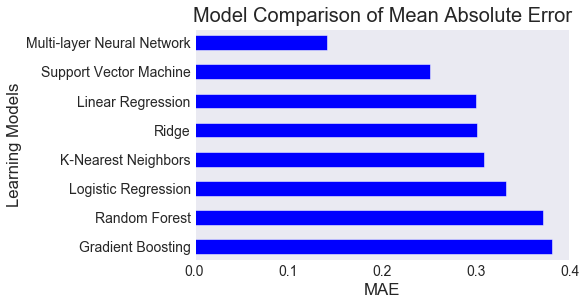

In [127]:
machineModels = pd.DataFrame({"model": ["Linear Regression", "Logistic Regression", "Support Vector Machine",
                                           "Random Forest", "Gradient Boosting",
                                            "K-Nearest Neighbors", "Ridge", "Multi-layer Neural Network"],
                                 "mae": [LRmae, LogRmae, SVMmae, RandomForestmae, 
                                         GradientBoostingmae, KNNmae, ridge_mae, model_mae]})
machineModels.sort_values("mae", ascending=False).plot(x="model", y="mae", kind="barh",
                                                           color="blue", legend=False)
plt.xticks(rotation=0)
plt.ylabel("Learning Models"); plt.yticks(size=14); plt.xlabel("MAE"); plt.xticks(size=14)
plt.title("Model Comparison of Mean Absolute Error", size=20);
plt.savefig('../templates/images/MAEcomparisonFeatures.png', bbox_inches='tight')

In [17]:
data["Weighted_Score"] = (data["User_Score"] * 10 * data["User_Count"] + 
                            data["Critic_Score"] * data["Critic_Count"]) / (data["User_Count"] + data["Critic_Count"])


In [18]:
data

,Unnamed: 0,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,...,Developer,Rating,PlayScore,GameScore,CriticScore,GlobalSellers,TopSellers,TopRated,Critc_Count,Weighted_Score
0,0,323,2,2013,0,81,7.02,9.09,0.98,3.96,...,303,2,9.29,9.34,9.24,0,1,1,46,81.727992
1,1,109,2,2012,8,3,4.99,5.73,0.65,2.42,...,380,2,7.73,7.52,7.95,3,1,0,17,52.844115
2,2,113,2,2011,8,3,5.54,5.73,0.49,1.57,...,184,2,8.00,7.56,8.44,3,1,1,35,32.140527
3,3,457,0,2011,6,56,5.03,4.02,2.69,0.91,...,300,0,9.09,9.77,8.41,3,1,1,69,78.479433
4,4,108,2,2010,8,3,5.99,4.37,0.48,1.79,...,380,2,8.16,7.91,8.41,3,1,1,54,63.345486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,1190,17,1,2008,1,10,0.00,0.01,0.00,0.00,...,114,2,6.02,5.66,6.38,2,0,0,15,52.562874
1191,1191,127,1,2007,8,17,0.00,0.01,0.00,0.00,...,227,2,7.04,7.38,6.71,2,0,0,21,69.958848
1192,1192,870,1,2012,0,3,0.01,0.00,0.00,0.00,...,175,3,8.39,8.98,7.80,2,0,0,9,75.313433
1193,1193,872,1,2009,0,58,0.00,0.01,0.00,0.00,...,144,1,8.61,9.34,7.87,2,0,0,46,78.375465


In [61]:
weighted_features = data[["Weighted_Score", "Critic_Score", "User_Score", "PlayScore", "GameScore", "CriticScore", "User_Count", "Critic_Count", "TopSellers"]]

X = full_features.drop(["TopSellers"], axis=1)
y = features['TopSellers'].values.reshape(-1, 1)

print(X.shape)

(1195, 8)


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=462)

In [63]:
LR = LinearRegression()
LRmae_weighted = error(LR)
LRprediction_weighted = prediction(LR)
LRaccuracy_weighted = accuracy(LR)

print("Linear Regression Performance: Prediction Accuracy = {:.04f}".format(LRaccuracy_weighted))
print("Linear Regression Performance: MAE = {:.04f}".format(LRmae_weighted))

Linear Regression Performance: Prediction Accuracy = 0.2698
Linear Regression Performance: MAE = 0.2777


In [64]:
SVM = SVC(C = 1000, gamma=0.1)
SVMmae_weighted = error(SVM)
SVMprediction_weighted = prediction(SVM)
SVMaccuracy_weighted = accuracy(SVM)

print("Support Vector Machine Performance: Prediction Accuracy = {:.04f}".format(SVMaccuracy_weighted))
print("Support Vector Machine Performance: MAE = {:.04f}".format(SVMmae_weighted))


C:\Users\gatli\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gatli\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gatli\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Support Vector Machine Performance: Prediction Accuracy = 0.7726
Support Vector Machine Performance: MAE = 0.2259


In [65]:
LogR = LogisticRegression()
LogRmae_weighted = error(LogR)
LogRprediction_weighted = prediction(LogR)
LogRaccuracy_weighted = accuracy(LogR)

print("Logistic Regression Performance: Prediction Accuracy = {:.04f}".format(LogRaccuracy_weighted))
print("Logistic Regression Performance: MAE = {:.04f}".format(LogRmae_weighted))


Logistic Regression Performance: Prediction Accuracy = 0.8261
Logistic Regression Performance: MAE = 0.3108


C:\Users\gatli\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gatli\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\gatli\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

In [66]:
RandomForest = RandomForestRegressor(random_state=60)
RFmae_weighted = error(RandomForest)
RFprediction_weighted = prediction(RandomForest)
RFaccuracy_weighted = accuracy(RandomForest)

print("Random Forest Performance: Prediction Accuracy = {:.04f}".format(RFaccuracy_weighted))
print("Random Performance: MAE = {:.04f}".format(RFmae_weighted))


C:\Users\gatli\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\gatli\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\gatli\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Random Forest Performance: Prediction Accuracy = 0.1743
Random Performance: MAE = 0.3677


In [67]:
GB = GradientBoostingRegressor(random_state=60)
GBmae_weighted = error(GB)
GBprediction_weighted = prediction(GB)
GBaccuracy_weighted = accuracy(GB)

print("Gradient Boosting Regression Performance: Prediction Accuracy = {:.04f}".format(GBaccuracy_weighted))
print("Gradient Boosting Regression Performance: MAE = {:.04f}".format(GBmae_weighted))


C:\Users\gatli\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gatli\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Regression Performance: Prediction Accuracy = 0.2380
Gradient Boosting Regression Performance: MAE = 0.3668


C:\Users\gatli\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
KNN = KNeighborsRegressor(n_neighbors=10)
KNNmae_weighted = error(KNN)
KNNprediction_weighted = prediction(KNN)
KNNaccuracy_weighted = accuracy(KNN)

print("K-Nearest Neighbors Performance: Prediction Accuracy = {:.04f}".format(KNNaccuracy_weighted))
print("K-Nearest Neighbors Performance: MAE = {:.04f}".format(KNNmae))


K-Nearest Neighbors Performance: Prediction Accuracy = 0.0584
K-Nearest Neighbors Performance: MAE = 0.3010


In [69]:
ridge = Ridge(alpha=10)
ridge_mae_weighted = error(ridge)
ridge_prediction_weighted = prediction(ridge)
ridge_accuracy_weighted = accuracy(ridge)

print("Ridge Performance: Prediction Accuracy = {:.04f}".format(ridge_accuracy_weighted))
print("Ridge Performance: MAE = {:.04f}".format(ridge_mae))

Ridge Performance: Prediction Accuracy = 0.2672
Ridge Performance: MAE = 0.3096


In [82]:
from sklearn.preprocessing import StandardScaler

#features = data[["Weighted_Score", "Critic_Score", "User_Score", "PlayScore", "GameScore", "CriticScore", "User_Count", "Critic_Count", "TopSellers"]]
#features = data.copy()
X = weighted_features.drop(['TopSellers'], axis=1)
y = features['TopSellers'].values.reshape(-1, 1)

X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

print(X.shape)

(1195, 8)


In [83]:
from tensorflow.keras.utils import to_categorical

y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)


In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_weighted = Sequential()
model_weighted.add(Dense(units=6, activation='relu', input_dim=8))
model_weighted.add(Dense(units=6, activation='relu'))
model_weighted.add(Dense(units=2, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 6)                 48        
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 14        
Total params: 104
Trainable params: 104
Non-trainable params: 0
_________________________________________________________________


In [85]:
model_weighted.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'mse'])
model_weighted.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=1000,
    shuffle=True,
    verbose=2
)

Epoch 1/1000
28/28 - 0s - loss: 0.9618 - accuracy: 0.3951 - mse: 0.3477
Epoch 2/1000
28/28 - 0s - loss: 0.7713 - accuracy: 0.5156 - mse: 0.2781
Epoch 3/1000
28/28 - 0s - loss: 0.6439 - accuracy: 0.6440 - mse: 0.2244
Epoch 4/1000
28/28 - 0s - loss: 0.5621 - accuracy: 0.7400 - mse: 0.1883
Epoch 5/1000
28/28 - 0s - loss: 0.5189 - accuracy: 0.7656 - mse: 0.1704
Epoch 6/1000
28/28 - 0s - loss: 0.4975 - accuracy: 0.7634 - mse: 0.1626
Epoch 7/1000
28/28 - 0s - loss: 0.4842 - accuracy: 0.7656 - mse: 0.1583
Epoch 8/1000
28/28 - 0s - loss: 0.4752 - accuracy: 0.7679 - mse: 0.1553
Epoch 9/1000
28/28 - 0s - loss: 0.4686 - accuracy: 0.7768 - mse: 0.1533
Epoch 10/1000
28/28 - 0s - loss: 0.4630 - accuracy: 0.7746 - mse: 0.1515
Epoch 11/1000
28/28 - 0s - loss: 0.4585 - accuracy: 0.7790 - mse: 0.1501
Epoch 12/1000
28/28 - 0s - loss: 0.4547 - accuracy: 0.7779 - mse: 0.1488
Epoch 13/1000
28/28 - 0s - loss: 0.4513 - accuracy: 0.7790 - mse: 0.1477
Epoch 14/1000
28/28 - 0s - loss: 0.4483 - accuracy: 0.7835 -

Epoch 114/1000
28/28 - 0s - loss: 0.3919 - accuracy: 0.8237 - mse: 0.1248
Epoch 115/1000
28/28 - 0s - loss: 0.3916 - accuracy: 0.8225 - mse: 0.1246
Epoch 116/1000
28/28 - 0s - loss: 0.3916 - accuracy: 0.8225 - mse: 0.1247
Epoch 117/1000
28/28 - 0s - loss: 0.3913 - accuracy: 0.8225 - mse: 0.1245
Epoch 118/1000
28/28 - 0s - loss: 0.3913 - accuracy: 0.8225 - mse: 0.1245
Epoch 119/1000
28/28 - 0s - loss: 0.3915 - accuracy: 0.8192 - mse: 0.1246
Epoch 120/1000
28/28 - 0s - loss: 0.3908 - accuracy: 0.8237 - mse: 0.1244
Epoch 121/1000
28/28 - 0s - loss: 0.3907 - accuracy: 0.8237 - mse: 0.1243
Epoch 122/1000
28/28 - 0s - loss: 0.3907 - accuracy: 0.8214 - mse: 0.1243
Epoch 123/1000
28/28 - 0s - loss: 0.3905 - accuracy: 0.8237 - mse: 0.1242
Epoch 124/1000
28/28 - 0s - loss: 0.3905 - accuracy: 0.8203 - mse: 0.1242
Epoch 125/1000
28/28 - 0s - loss: 0.3904 - accuracy: 0.8214 - mse: 0.1243
Epoch 126/1000
28/28 - 0s - loss: 0.3901 - accuracy: 0.8214 - mse: 0.1242
Epoch 127/1000
28/28 - 0s - loss: 0.39

Epoch 225/1000
28/28 - 0s - loss: 0.3762 - accuracy: 0.8270 - mse: 0.1191
Epoch 226/1000
28/28 - 0s - loss: 0.3763 - accuracy: 0.8270 - mse: 0.1193
Epoch 227/1000
28/28 - 0s - loss: 0.3766 - accuracy: 0.8281 - mse: 0.1194
Epoch 228/1000
28/28 - 0s - loss: 0.3762 - accuracy: 0.8304 - mse: 0.1192
Epoch 229/1000
28/28 - 0s - loss: 0.3761 - accuracy: 0.8304 - mse: 0.1192
Epoch 230/1000
28/28 - 0s - loss: 0.3761 - accuracy: 0.8292 - mse: 0.1192
Epoch 231/1000
28/28 - 0s - loss: 0.3757 - accuracy: 0.8259 - mse: 0.1190
Epoch 232/1000
28/28 - 0s - loss: 0.3751 - accuracy: 0.8304 - mse: 0.1188
Epoch 233/1000
28/28 - 0s - loss: 0.3751 - accuracy: 0.8292 - mse: 0.1188
Epoch 234/1000
28/28 - 0s - loss: 0.3750 - accuracy: 0.8292 - mse: 0.1188
Epoch 235/1000
28/28 - 0s - loss: 0.3753 - accuracy: 0.8315 - mse: 0.1188
Epoch 236/1000
28/28 - 0s - loss: 0.3750 - accuracy: 0.8292 - mse: 0.1187
Epoch 237/1000
28/28 - 0s - loss: 0.3751 - accuracy: 0.8292 - mse: 0.1188
Epoch 238/1000
28/28 - 0s - loss: 0.37

Epoch 336/1000
28/28 - 0s - loss: 0.3657 - accuracy: 0.8426 - mse: 0.1156
Epoch 337/1000
28/28 - 0s - loss: 0.3669 - accuracy: 0.8382 - mse: 0.1159
Epoch 338/1000
28/28 - 0s - loss: 0.3659 - accuracy: 0.8393 - mse: 0.1157
Epoch 339/1000
28/28 - 0s - loss: 0.3655 - accuracy: 0.8426 - mse: 0.1153
Epoch 340/1000
28/28 - 0s - loss: 0.3657 - accuracy: 0.8460 - mse: 0.1155
Epoch 341/1000
28/28 - 0s - loss: 0.3650 - accuracy: 0.8415 - mse: 0.1152
Epoch 342/1000
28/28 - 0s - loss: 0.3657 - accuracy: 0.8426 - mse: 0.1154
Epoch 343/1000
28/28 - 0s - loss: 0.3656 - accuracy: 0.8426 - mse: 0.1155
Epoch 344/1000
28/28 - 0s - loss: 0.3655 - accuracy: 0.8415 - mse: 0.1153
Epoch 345/1000
28/28 - 0s - loss: 0.3652 - accuracy: 0.8404 - mse: 0.1153
Epoch 346/1000
28/28 - 0s - loss: 0.3654 - accuracy: 0.8482 - mse: 0.1153
Epoch 347/1000
28/28 - 0s - loss: 0.3645 - accuracy: 0.8449 - mse: 0.1151
Epoch 348/1000
28/28 - 0s - loss: 0.3645 - accuracy: 0.8449 - mse: 0.1151
Epoch 349/1000
28/28 - 0s - loss: 0.36

Epoch 447/1000
28/28 - 0s - loss: 0.3575 - accuracy: 0.8527 - mse: 0.1125
Epoch 448/1000
28/28 - 0s - loss: 0.3573 - accuracy: 0.8460 - mse: 0.1123
Epoch 449/1000
28/28 - 0s - loss: 0.3572 - accuracy: 0.8516 - mse: 0.1124
Epoch 450/1000
28/28 - 0s - loss: 0.3578 - accuracy: 0.8493 - mse: 0.1126
Epoch 451/1000
28/28 - 0s - loss: 0.3593 - accuracy: 0.8460 - mse: 0.1130
Epoch 452/1000
28/28 - 0s - loss: 0.3589 - accuracy: 0.8504 - mse: 0.1130
Epoch 453/1000
28/28 - 0s - loss: 0.3574 - accuracy: 0.8460 - mse: 0.1124
Epoch 454/1000
28/28 - 0s - loss: 0.3568 - accuracy: 0.8504 - mse: 0.1122
Epoch 455/1000
28/28 - 0s - loss: 0.3570 - accuracy: 0.8482 - mse: 0.1121
Epoch 456/1000
28/28 - 0s - loss: 0.3567 - accuracy: 0.8482 - mse: 0.1122
Epoch 457/1000
28/28 - 0s - loss: 0.3568 - accuracy: 0.8493 - mse: 0.1122
Epoch 458/1000
28/28 - 0s - loss: 0.3566 - accuracy: 0.8460 - mse: 0.1121
Epoch 459/1000
28/28 - 0s - loss: 0.3568 - accuracy: 0.8527 - mse: 0.1122
Epoch 460/1000
28/28 - 0s - loss: 0.35

Epoch 558/1000
28/28 - 0s - loss: 0.3530 - accuracy: 0.8460 - mse: 0.1111
Epoch 559/1000
28/28 - 0s - loss: 0.3537 - accuracy: 0.8482 - mse: 0.1113
Epoch 560/1000
28/28 - 0s - loss: 0.3533 - accuracy: 0.8504 - mse: 0.1113
Epoch 561/1000
28/28 - 0s - loss: 0.3530 - accuracy: 0.8471 - mse: 0.1111
Epoch 562/1000
28/28 - 0s - loss: 0.3524 - accuracy: 0.8471 - mse: 0.1109
Epoch 563/1000
28/28 - 0s - loss: 0.3529 - accuracy: 0.8482 - mse: 0.1111
Epoch 564/1000
28/28 - 0s - loss: 0.3531 - accuracy: 0.8482 - mse: 0.1112
Epoch 565/1000
28/28 - 0s - loss: 0.3526 - accuracy: 0.8482 - mse: 0.1109
Epoch 566/1000
28/28 - 0s - loss: 0.3526 - accuracy: 0.8493 - mse: 0.1109
Epoch 567/1000
28/28 - 0s - loss: 0.3521 - accuracy: 0.8482 - mse: 0.1108
Epoch 568/1000
28/28 - 0s - loss: 0.3536 - accuracy: 0.8493 - mse: 0.1112
Epoch 569/1000
28/28 - 0s - loss: 0.3526 - accuracy: 0.8471 - mse: 0.1109
Epoch 570/1000
28/28 - 0s - loss: 0.3521 - accuracy: 0.8460 - mse: 0.1108
Epoch 571/1000
28/28 - 0s - loss: 0.35

Epoch 669/1000
28/28 - 0s - loss: 0.3492 - accuracy: 0.8482 - mse: 0.1099
Epoch 670/1000
28/28 - 0s - loss: 0.3495 - accuracy: 0.8493 - mse: 0.1098
Epoch 671/1000
28/28 - 0s - loss: 0.3488 - accuracy: 0.8493 - mse: 0.1097
Epoch 672/1000
28/28 - 0s - loss: 0.3489 - accuracy: 0.8482 - mse: 0.1097
Epoch 673/1000
28/28 - 0s - loss: 0.3493 - accuracy: 0.8471 - mse: 0.1098
Epoch 674/1000
28/28 - 0s - loss: 0.3491 - accuracy: 0.8471 - mse: 0.1098
Epoch 675/1000
28/28 - 0s - loss: 0.3487 - accuracy: 0.8504 - mse: 0.1097
Epoch 676/1000
28/28 - 0s - loss: 0.3494 - accuracy: 0.8493 - mse: 0.1099
Epoch 677/1000
28/28 - 0s - loss: 0.3489 - accuracy: 0.8493 - mse: 0.1097
Epoch 678/1000
28/28 - 0s - loss: 0.3488 - accuracy: 0.8493 - mse: 0.1097
Epoch 679/1000
28/28 - 0s - loss: 0.3498 - accuracy: 0.8516 - mse: 0.1099
Epoch 680/1000
28/28 - 0s - loss: 0.3485 - accuracy: 0.8504 - mse: 0.1096
Epoch 681/1000
28/28 - 0s - loss: 0.3500 - accuracy: 0.8493 - mse: 0.1102
Epoch 682/1000
28/28 - 0s - loss: 0.34

Epoch 780/1000
28/28 - 0s - loss: 0.3467 - accuracy: 0.8538 - mse: 0.1090
Epoch 781/1000
28/28 - 0s - loss: 0.3467 - accuracy: 0.8516 - mse: 0.1091
Epoch 782/1000
28/28 - 0s - loss: 0.3466 - accuracy: 0.8527 - mse: 0.1091
Epoch 783/1000
28/28 - 0s - loss: 0.3468 - accuracy: 0.8504 - mse: 0.1091
Epoch 784/1000
28/28 - 0s - loss: 0.3464 - accuracy: 0.8527 - mse: 0.1089
Epoch 785/1000
28/28 - 0s - loss: 0.3466 - accuracy: 0.8549 - mse: 0.1090
Epoch 786/1000
28/28 - 0s - loss: 0.3472 - accuracy: 0.8549 - mse: 0.1091
Epoch 787/1000
28/28 - 0s - loss: 0.3460 - accuracy: 0.8538 - mse: 0.1088
Epoch 788/1000
28/28 - 0s - loss: 0.3461 - accuracy: 0.8527 - mse: 0.1088
Epoch 789/1000
28/28 - 0s - loss: 0.3461 - accuracy: 0.8549 - mse: 0.1087
Epoch 790/1000
28/28 - 0s - loss: 0.3468 - accuracy: 0.8482 - mse: 0.1090
Epoch 791/1000
28/28 - 0s - loss: 0.3470 - accuracy: 0.8516 - mse: 0.1092
Epoch 792/1000
28/28 - 0s - loss: 0.3460 - accuracy: 0.8504 - mse: 0.1088
Epoch 793/1000
28/28 - 0s - loss: 0.34

Epoch 891/1000
28/28 - 0s - loss: 0.3449 - accuracy: 0.8549 - mse: 0.1084
Epoch 892/1000
28/28 - 0s - loss: 0.3454 - accuracy: 0.8538 - mse: 0.1087
Epoch 893/1000
28/28 - 0s - loss: 0.3459 - accuracy: 0.8527 - mse: 0.1086
Epoch 894/1000
28/28 - 0s - loss: 0.3458 - accuracy: 0.8538 - mse: 0.1088
Epoch 895/1000
28/28 - 0s - loss: 0.3452 - accuracy: 0.8549 - mse: 0.1085
Epoch 896/1000
28/28 - 0s - loss: 0.3456 - accuracy: 0.8527 - mse: 0.1087
Epoch 897/1000
28/28 - 0s - loss: 0.3454 - accuracy: 0.8527 - mse: 0.1086
Epoch 898/1000
28/28 - 0s - loss: 0.3457 - accuracy: 0.8527 - mse: 0.1088
Epoch 899/1000
28/28 - 0s - loss: 0.3448 - accuracy: 0.8538 - mse: 0.1083
Epoch 900/1000
28/28 - 0s - loss: 0.3448 - accuracy: 0.8538 - mse: 0.1084
Epoch 901/1000
28/28 - 0s - loss: 0.3445 - accuracy: 0.8549 - mse: 0.1082
Epoch 902/1000
28/28 - 0s - loss: 0.3446 - accuracy: 0.8527 - mse: 0.1083
Epoch 903/1000
28/28 - 0s - loss: 0.3445 - accuracy: 0.8527 - mse: 0.1083
Epoch 904/1000
28/28 - 0s - loss: 0.34

In [86]:
model_loss_weighted, model_accuracy_weighted, model_mae_weighted= model_weighted.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {model_loss_weighted}, Accuracy: {model_accuracy_weighted}, MAE: {model_mae_weighted}")

10/10 - 0s - loss: 0.4436 - accuracy: 0.8094 - mse: 0.1344
Loss: 0.44355344772338867, Accuracy: 0.8093645572662354, MAE: 0.1343843787908554


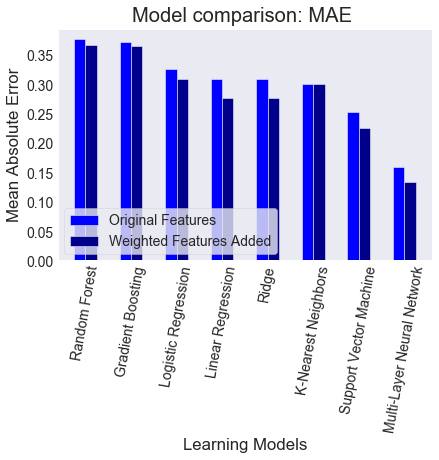

In [93]:
N = 8
models = ["Random Forest", "Gradient Boosting", "Logistic Regression", "Linear Regression", "Ridge", "K-Nearest Neighbors", "Support Vector Machine", "Multi-Layer Neural Network"]
mae = np.array([RandomForestmae, GradientBoostingmae, LogRmae, LRmae, ridge_mae, KNNmae, SVMmae, model_mae])
mae_weighted = np.array([RFmae_weighted, GBmae_weighted, LogRmae_weighted, LRmae_weighted, ridge_mae_weighted,  KNNmae_weighted, SVMmae_weighted, model_mae_weighted])
ind = np.arange(N)

width = .25
plt.bar(ind, mae, width=width, color='blue', label='Original Features')
plt.bar(ind + width, mae_weighted, width=width, color='darkblue',
    label='Weighted Features Added')
plt.xticks(ind + width / 2, models, rotation=80)
plt.ylabel("Mean Absolute Error")
plt.xlabel("Learning Models")
plt.legend(loc="lower left")
plt.title("Model comparison: MAE ")
plt.savefig('../templates/images/MAEcomparisonWeighted.png', bbox_inches='tight')
plt.show()


In [101]:
not_hit_copy = data[data['TopSellers'] == 0]

In [104]:
df4 = not_hit_copy
y = df4['TopSellers'].values
df4 = df4.drop(['TopSellers'],axis=1)
X = df4.values

In [107]:
print(X)

[[9.90000000e+01 4.41000000e+02 2.00000000e+00 ... 0.00000000e+00
  1.80000000e+01 5.33902439e+01]
 [2.99000000e+02 7.31000000e+02 0.00000000e+00 ... 0.00000000e+00
  6.10000000e+01 7.36554054e+01]
 [3.00000000e+02 7.06000000e+02 2.00000000e+00 ... 0.00000000e+00
  1.40000000e+01 4.56000000e+01]
 ...
 [1.19200000e+03 8.70000000e+02 1.00000000e+00 ... 0.00000000e+00
  9.00000000e+00 7.53134328e+01]
 [1.19300000e+03 8.72000000e+02 1.00000000e+00 ... 0.00000000e+00
  4.60000000e+01 7.83754647e+01]
 [1.19400000e+03 4.81000000e+02 1.00000000e+00 ... 0.00000000e+00
  1.60000000e+01 7.44722222e+01]]


In [106]:
pred = model_weighted.predict_proba(X)

Instructions for updating:
Please use `model.predict()` instead.


ValueError: in user code:

    C:\Users\gatli\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\Users\gatli\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\gatli\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\gatli\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\gatli\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\gatli\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    C:\Users\gatli\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    C:\Users\gatli\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:976 __call__
        self.name)
    C:\Users\gatli\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer sequential_3 is incompatible with the layer: expected axis -1 of input shape to have value 15 but received input with shape [None, 24]


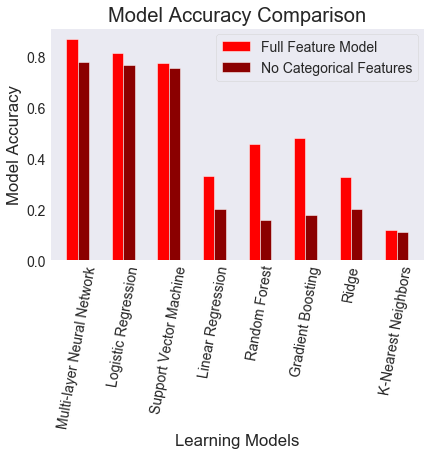

In [75]:
N = 8
AccModels = [ "Multi-layer Neural Network", "Logistic Regression", "Support Vector Machine",
                                           "Linear Regression", "Random Forest", "Gradient Boosting",
                                        "Ridge","K-Nearest Neighbors"]
accuracy = np.array([model_accuracy, LogRaccuracy, SVMaccuracy, LRaccuracy, RFaccuracy, 
                                         GBaccuracy, ridge_accuracy, KNNaccuracy ])
accuracy_weighted = np.array([model_accuracy_weighted, LogRaccuracy_weighted, SVMaccuracy_weighted, 
                            LRaccuracy_weighted, RFaccuracy_weighted, GBaccuracy_weighted,
                              ridge_accuracy_weighted, KNNaccuracy_weighted])
ind = np.arange(N)
width = .25
plt.bar(ind, accuracy_weighted, width=width, color='red', label='Full Feature Model')
plt.bar(ind + width, accuracy, width=width, color='darkred', label='No Categorical Features')
plt.xticks(ind + width / 2, AccModels, rotation=80)
plt.ylabel("Model Accuracy")
plt.xlabel("Learning Models")
plt.legend(loc="upper right")
plt.title("Model Accuracy Comparison")
#plt.savefig('../templates/images/PREDcomparisonFullWeighted.png', bbox_inches='tight')
plt.show()


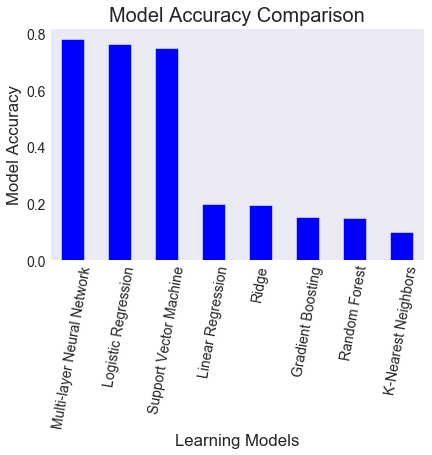

In [94]:
AccModels = pd.DataFrame({"AccModel": ["Linear Regression", "Logistic Regression", "Support Vector Machine",
                                           "Random Forest", "Gradient Boosting",
                                            "K-Nearest Neighbors", "Ridge", "Multi-layer Neural Network"],
                                 "accuracy": [LRaccuracy, LogRaccuracy, SVMaccuracy, RFaccuracy, 
                                         GBaccuracy, KNNaccuracy, ridge_accuracy, model_accuracy]})
AccModels.sort_values("accuracy", ascending=False).plot(x="AccModel", y="accuracy", kind="bar",
                                                           color="blue", legend=False)
plt.xticks(rotation=80)
plt.ylabel("Model Accuracy"); plt.yticks(size=14); plt.xlabel("Learning Models"); plt.xticks(size=14)
plt.title("Model Accuracy Comparison", size=20);
#plt.savefig('../templates/images/PREDcomparisonWeighted.png', bbox_inches='tight')

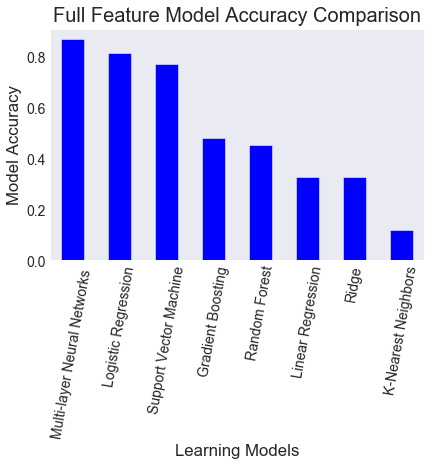

In [68]:
AccModels = pd.DataFrame({"AccModel": [ "Multi-layer Neural Networks ", "Logistic Regression", "Support Vector Machine",
                                           "Gradient Boosting", "Random Forest", 
                                            "K-Nearest Neighbors", "Linear Regression", "Ridge"],
                                 "accuracy": [model_accuracy_weighted,LogRaccuracy_weighted, SVMaccuracy_weighted, 
                                              GBaccuracy_weighted, RFaccuracy_weighted, KNNaccuracy_weighted, LRaccuracy_weighted,
                                              ridge_accuracy_weighted]})
AccModels.sort_values("accuracy", ascending=False).plot(x="AccModel", y="accuracy", kind="bar",
                                                           color="blue", legend=False)
plt.xticks(rotation=80)
plt.ylabel("Model Accuracy"); plt.yticks(size=14); plt.xlabel("Learning Models"); plt.xticks(size=14)
plt.title("Full Feature Model Accuracy Comparison", size=20);


NameError: name 'confusion_matrix' is not defined

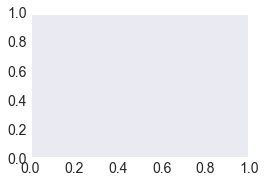

In [76]:
fig, ax = plt.subplots(figsize=(3.5,2.5))
sns.heatmap(confusion_matrix(y_test, x_test), annot=True, linewidths=.5, ax=ax, fmt="d").set(xlabel='Predicted Value', ylabel='Expected Value')
sns.plt.title('Training Set Confusion Matrix')

In [59]:
machineModels = pd.DataFrame({"model": ["Linear Regression", "Support Vector Machine",
                                           "Random Forest", "Gradient Boosting",
                                            "K-Nearest Neighbors", "Ridge"],
                                 "mae": [LRmae, SVMmae, RandomForestmae, 
                                         GradientBoostingmae, KNNmae, ridge_mae],
                                 "mae_weighted": [LRmae_weighted, SVMmae_weighted, RandomForestmae_weighted, 
                                         GradientBoostingmae_weighted, KNNmae_weighted, ridge_mae_weighted]})
        
machineModels.sort_values("mae_weighted", ascending=False).plot(x="model", y="mae_weighted", kind="bar",
                                                           color="red", legend=False)
machineModels.sort_values("mae", ascending=False).plot(x="model", y="mae", kind="bar",
                                                           color="blue", legend=False)
plt.xticks(rotation=80)
plt.ylabel(""); plt.yticks(size=14); plt.xlabel("Mean Absolute Error"); plt.xticks(size=14)
plt.title("Model Comparison on Test MAE", size=20);

NameError: name 'RandomForestmae_weighted' is not defined

In [34]:
# I want to do a graph here comparing the two charts mae